Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/refs/heads/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## there are null values present in coloumns which we will going to remove but lets do feature analysis first

## feature information
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

In [17]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64


Gender
Male      489
Female    112
Name: count, dtype: int64


Married
Yes    398
No     213
Name: count, dtype: int64


Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


Self_Employed
No     500
Yes     82
Name: count, dtype: int64


ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64


CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64


LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
    

<Axes: xlabel='Gender', ylabel='count'>

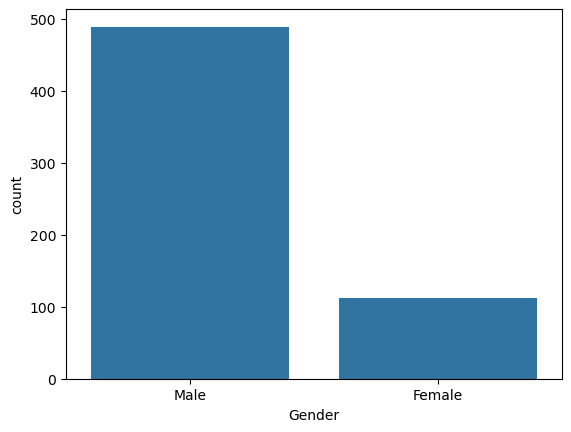

In [5]:
sns.countplot(x='Gender',data=df)

i can see male member count is more

<Axes: xlabel='Married', ylabel='count'>

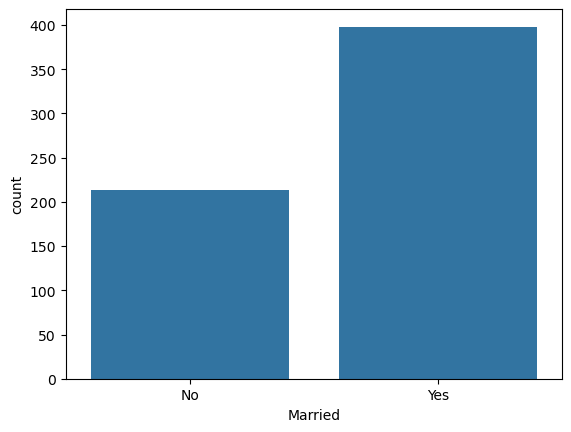

In [6]:
sns.countplot(x='Married',data=df)

i can see married people count is more in data

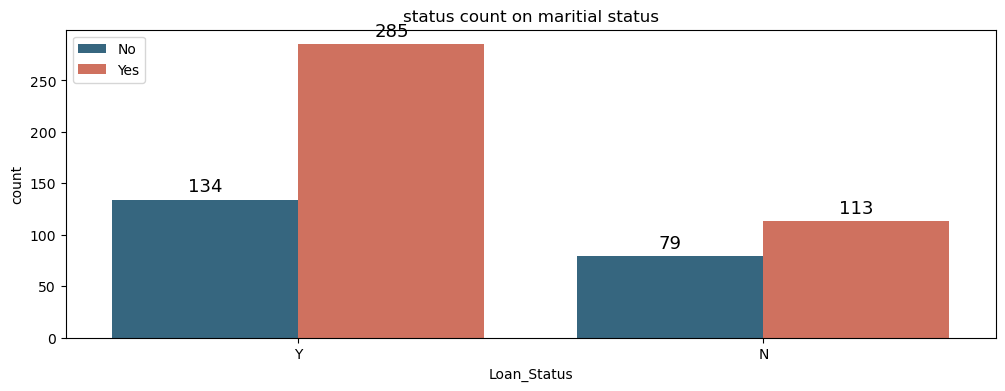

In [10]:
plt.figure(figsize=(12, 4))
palette = {"Yes": "#e2644c", "No": "#2a6a8b"}
bar = sns.countplot(x='Loan_Status',data=df,hue='Married',palette=palette)
for container in bar.containers:
    bar.bar_label(container,labels=[f'{int(label.get_height())}'for label in container],label_type='edge',color='k',fontsize=13,padding=3)
plt.title('status count on maritial status')
plt.legend(loc='upper left')

## i cam see there is not much effect on loan status because of married or un married loan status count value are according to theire prapotion

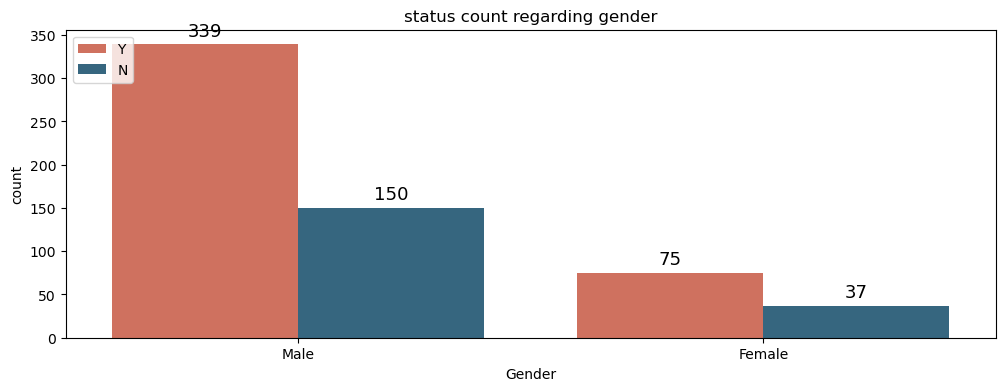

In [13]:
plt.figure(figsize=(12, 4))
palette = {"Y": "#e2644c", "N": "#2a6a8b"}
bar = sns.countplot(x='Gender',data=df,hue='Loan_Status',palette=palette)
for container in bar.containers:
    bar.bar_label(container,labels=[f'{int(label.get_height())}'for label in container],label_type='edge',color='k',fontsize=13,padding=3)
plt.title('status count regarding gender')
plt.legend(loc='upper left')

gender is aslo not impacting target variable 

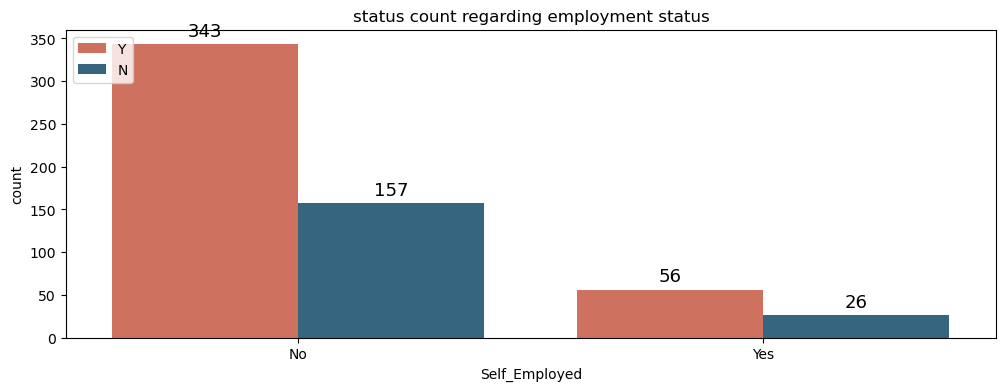

In [41]:
plt.figure(figsize=(12, 4))
palette = {"Y": "#e2644c", "N": "#2a6a8b"}
bar = sns.countplot(x='Self_Employed',data=df,hue='Loan_Status',palette=palette)
for container in bar.containers:
    bar.bar_label(container,labels=[f'{int(label.get_height())}'for label in container],label_type='edge',color='k',fontsize=13,padding=3)
plt.title('status count regarding employment status')
plt.legend(loc='upper left')

<Axes: >

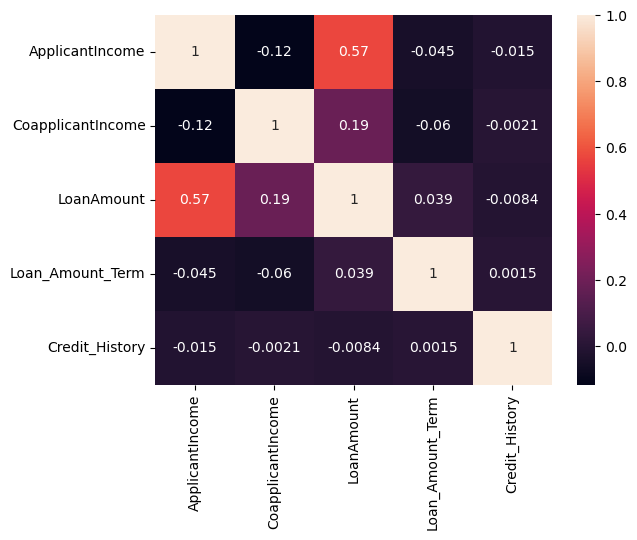

In [21]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

loan amount has good correlation with applicant income

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

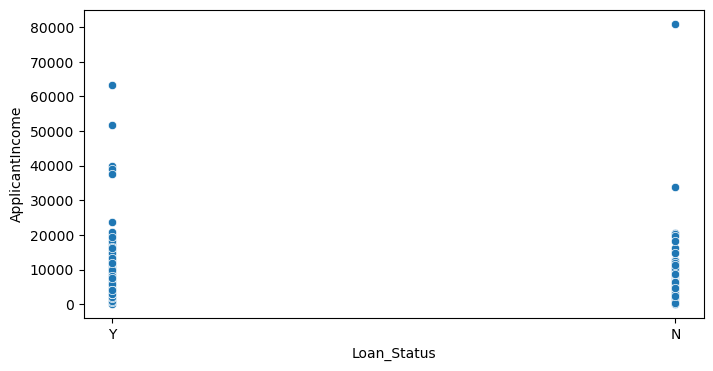

In [27]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Loan_Status',y='ApplicantIncome',data=df)

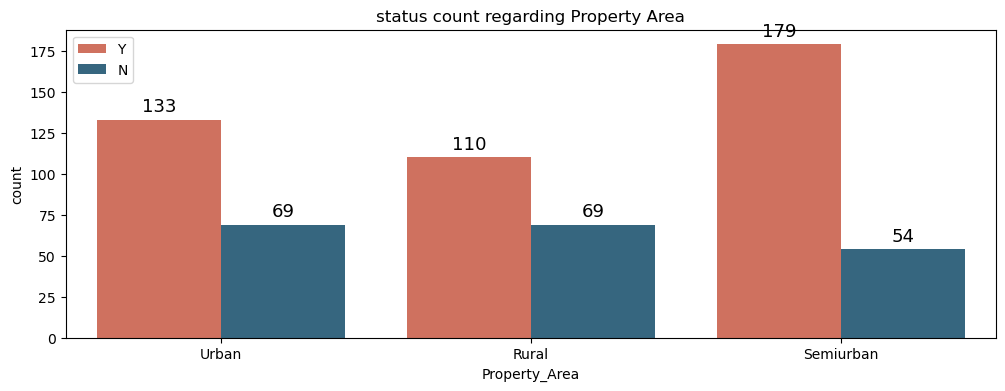

In [28]:
plt.figure(figsize=(12, 4))
palette = {"Y": "#e2644c", "N": "#2a6a8b"}
bar = sns.countplot(x='Property_Area',data=df,hue='Loan_Status',palette=palette)
for container in bar.containers:
    bar.bar_label(container,labels=[f'{int(label.get_height())}'for label in container],label_type='edge',color='k',fontsize=13,padding=3)
plt.title('status count regarding Property Area')
plt.legend(loc='upper left')

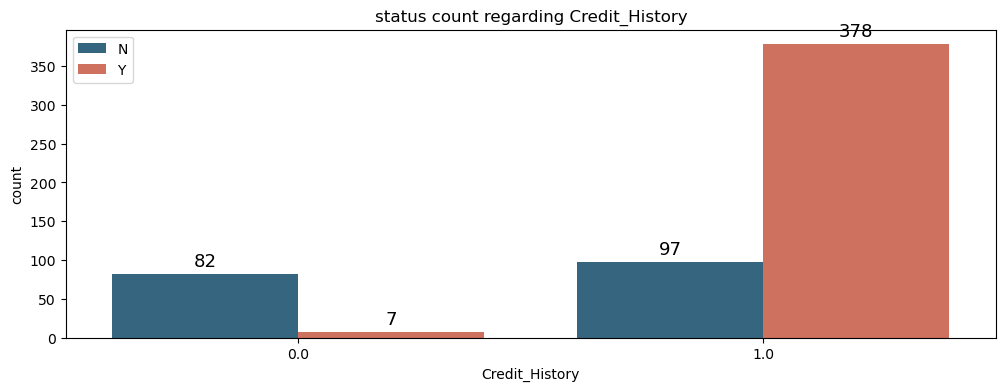

In [30]:
plt.figure(figsize=(12, 4))
palette = {"Y": "#e2644c", "N": "#2a6a8b"}
bar = sns.countplot(x='Credit_History',data=df,hue='Loan_Status',palette=palette)
for container in bar.containers:
    bar.bar_label(container,labels=[f'{int(label.get_height())}'for label in container],label_type='edge',color='k',fontsize=13,padding=3)
plt.title('status count regarding Credit_History')
plt.legend(loc='upper left')

<Axes: xlabel='Loan_Status', ylabel='Credit_History'>

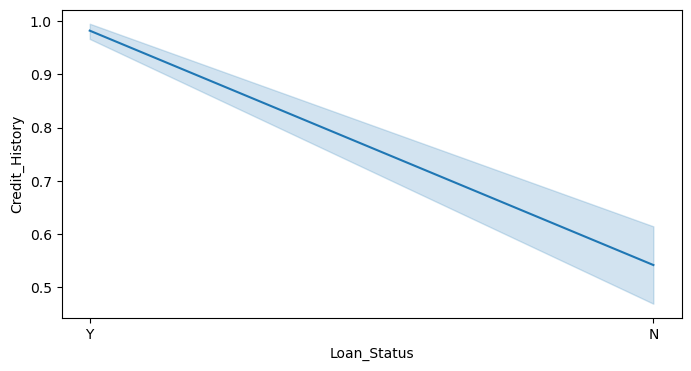

In [35]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Loan_Status',y='Credit_History',data=df)

if Credit is high chance of approval is high

<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

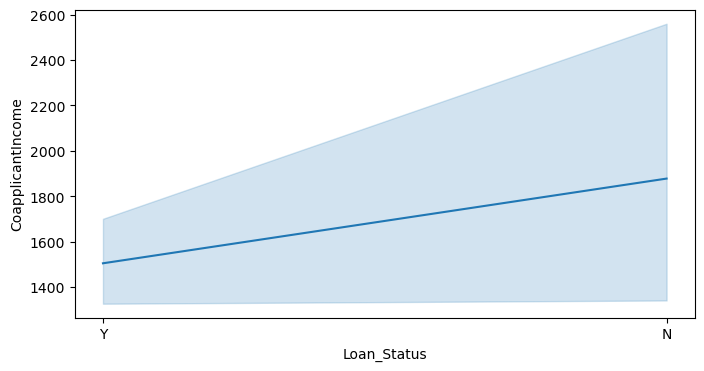

In [39]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Loan_Status',y='CoapplicantIncome',data=df)

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

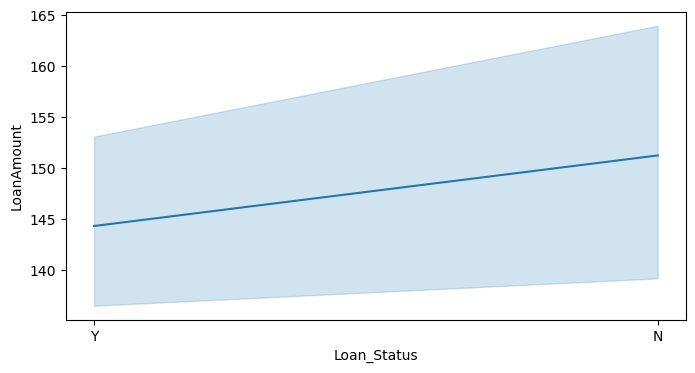

In [40]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Loan_Status',y='LoanAmount',data=df)

so we did data analysis now droping Loan_ID	coloumn

In [43]:
df.drop('Loan_ID',axis =1,inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [46]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [47]:
#lets fill null values
# filling null values with median in numerical columns
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [48]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [49]:
# filling null value in  categorical data
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [50]:
df.isnull().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [51]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

In [52]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

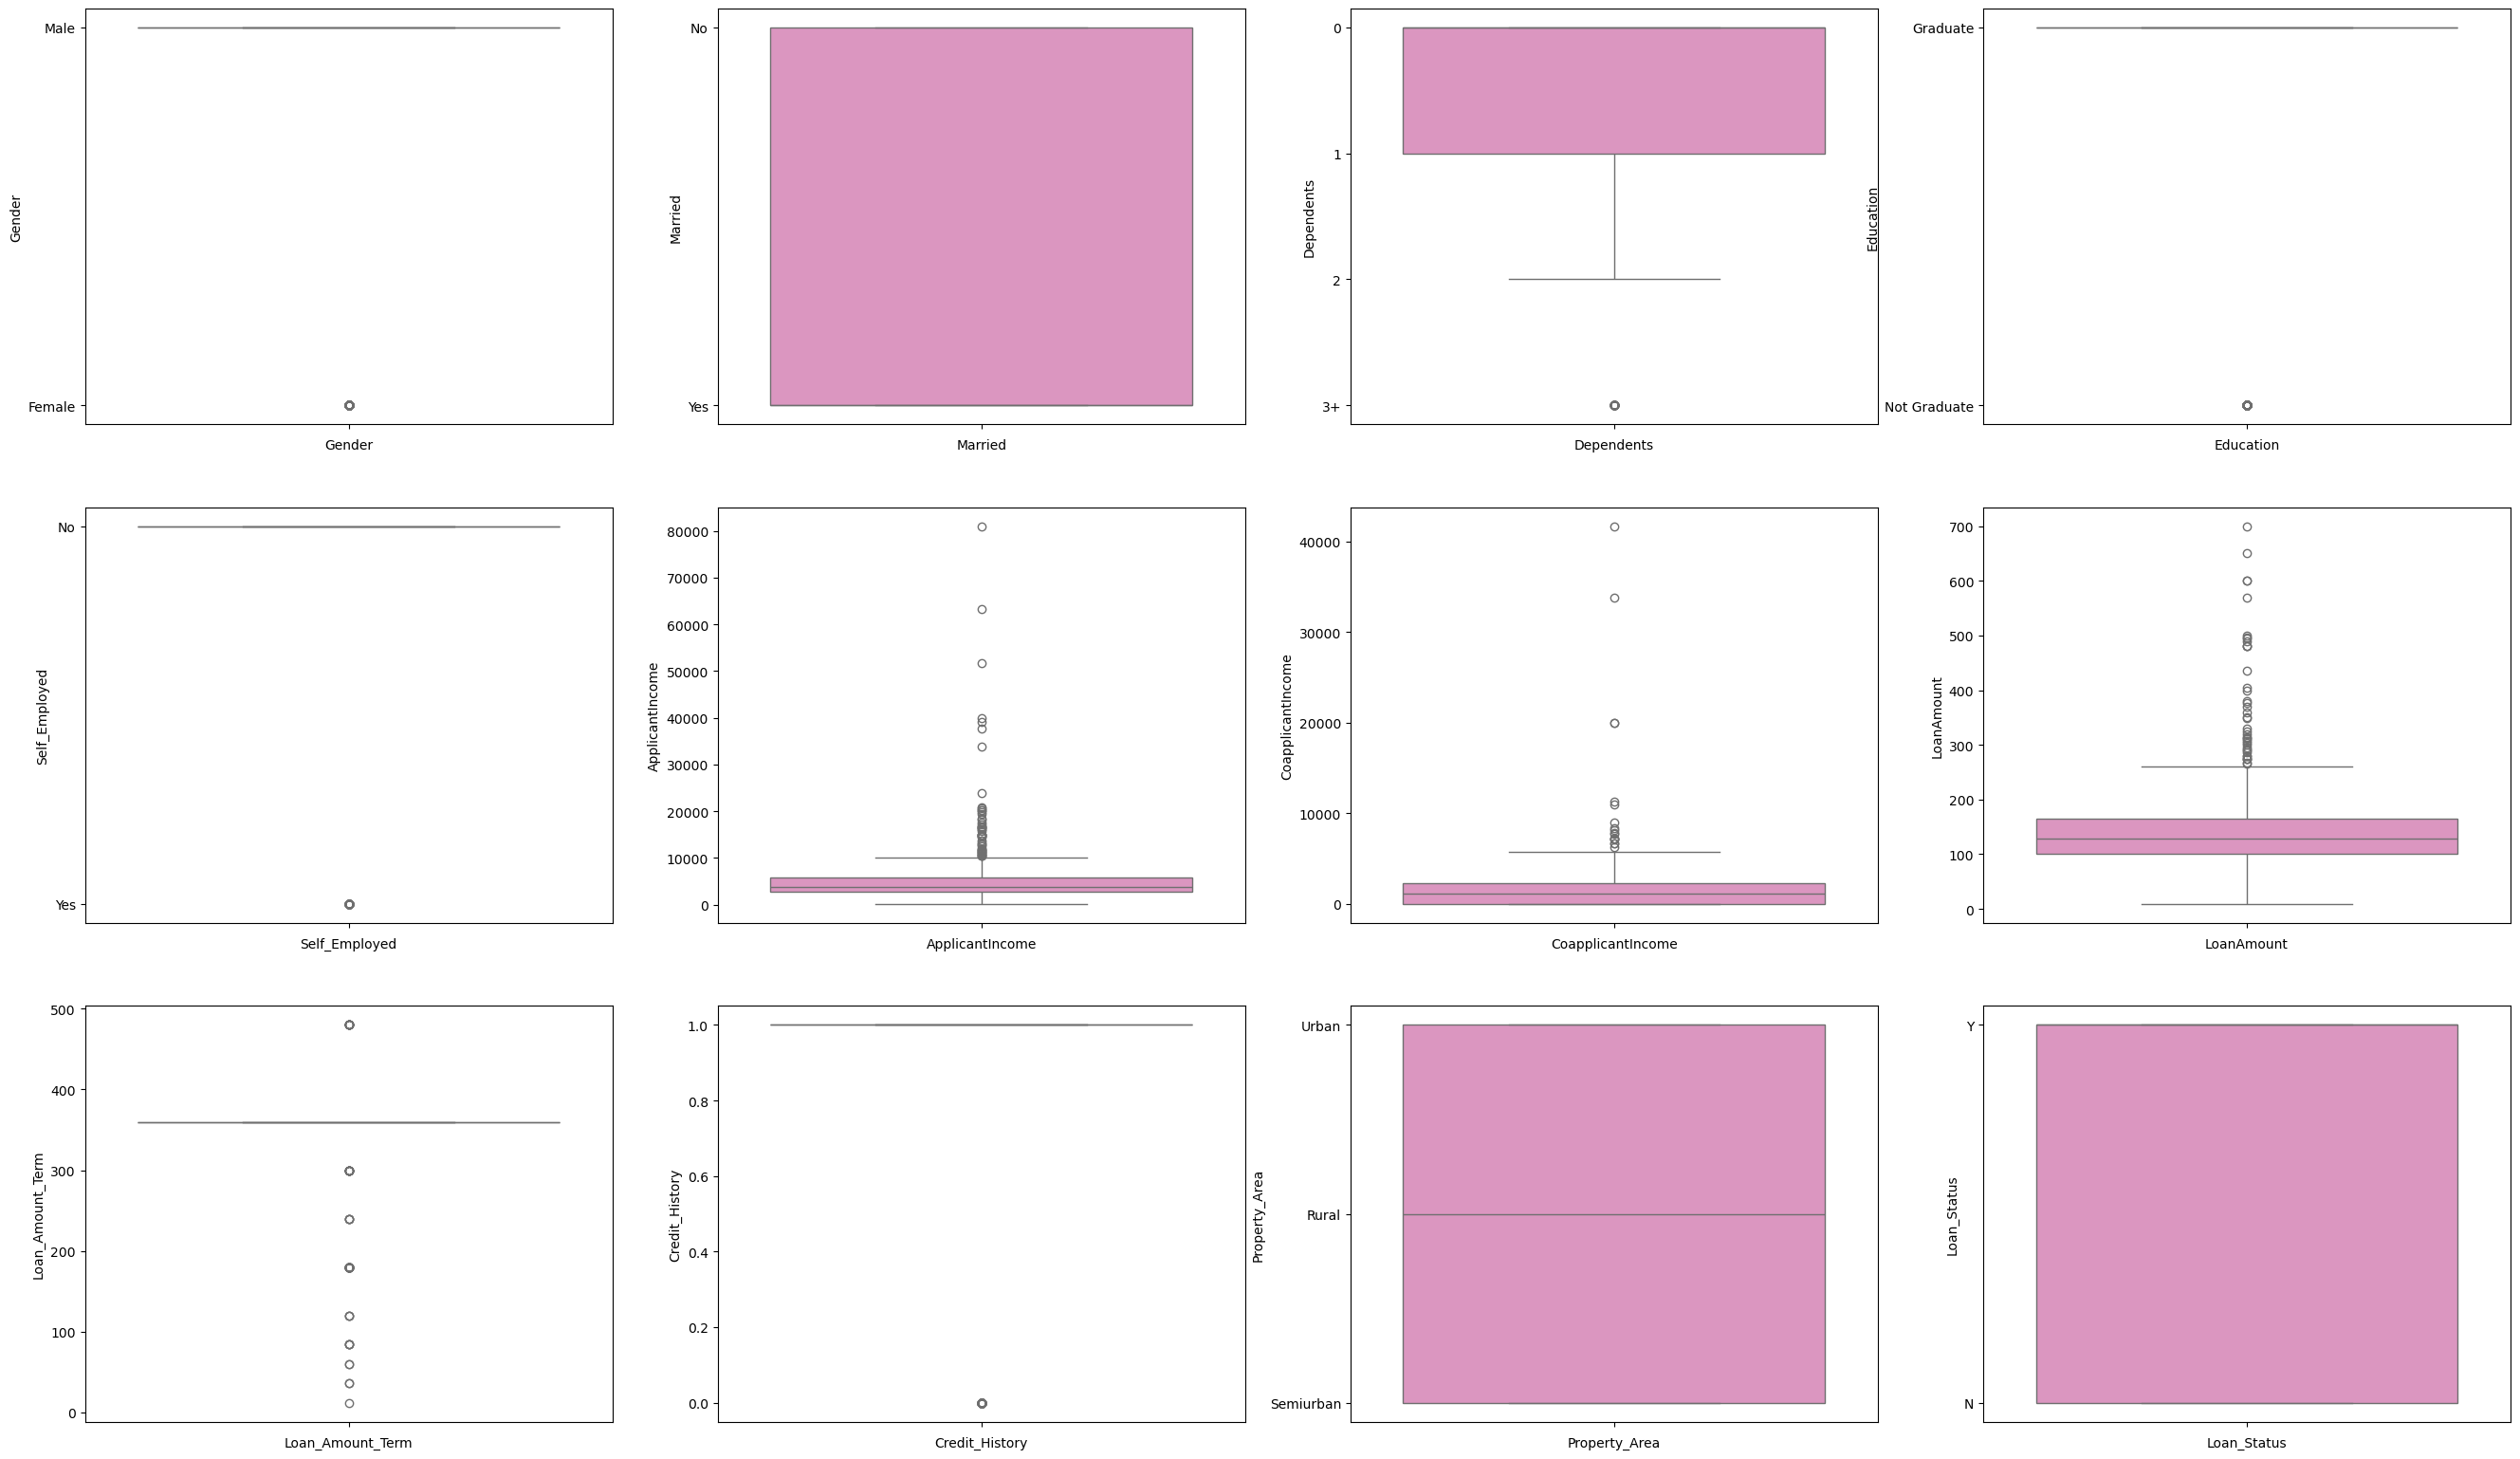

In [56]:
#lets check for outliers
plt.figure(figsize=(33,33))
n=1
for i in df:
    if n<=15:
        plt.subplot(5,4,n)
        sns.boxplot(df[i],palette="Set2_r")
        plt.xlabel(i)
    n+=1
plt.show()

In [57]:
#removing outliers
from scipy.stats import zscore

z=np.abs(zscore(df[['Credit_History','Loan_Amount_Term','LoanAmount','CoapplicantIncome','ApplicantIncome']]))
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604]), array([3, 1, 1, 1, 4, 2, 1, 2, 4, 2, 4, 2, 3, 4, 4, 1, 1, 2, 2, 1, 2, 4,
       2, 3, 4, 3, 2, 4, 2, 1, 1, 2, 2, 2, 1, 2, 1, 3, 1, 3, 2]))


In [58]:
z = np.abs(zscore(df[['Credit_History','Loan_Amount_Term','LoanAmount','CoapplicantIncome','ApplicantIncome']]))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (577, 12)
Percentage of data loss post outlier removal:  6.026058631921824


In [63]:
# lets convert catogorical data in numeric using lable encoder


In [64]:
from sklearn.preprocessing import LabelEncoder

In [74]:
lb=LabelEncoder()
df['Gender']=lb.fit_transform(df['Gender'])
df['Married']=lb.fit_transform(df['Married'])
df['Education']=lb.fit_transform(df['Education'])
df['Self_Employed']=lb.fit_transform(df['Self_Employed'])
df['Property_Area']=lb.fit_transform(df['Property_Area'])
df['Loan_Status']=lb.fit_transform(df['Loan_Status'])
df['Dependents']=lb.fit_transform(df['Dependents'])

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 577 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             577 non-null    int64  
 1   Married            577 non-null    int64  
 2   Dependents         577 non-null    int64  
 3   Education          577 non-null    int64  
 4   Self_Employed      577 non-null    int64  
 5   ApplicantIncome    577 non-null    int64  
 6   CoapplicantIncome  577 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   577 non-null    float64
 9   Credit_History     577 non-null    float64
 10  Property_Area      577 non-null    int64  
 11  Loan_Status        577 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 58.6 KB


In [78]:
#assigning feature and target data
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']
print("feature dimension=",x.shape)
print('label Dimension',y.shape)

feature dimension= (577, 11)
label Dimension (577,)


In [79]:
#standard scaling of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.399266,-0.861036,-0.130895,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,-0.028020,0.052840,-0.130895,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.562297,-0.861036,-1.235554,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.703039,0.567956,-0.273432,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.450230,-0.861036,0.100727,0.230853,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.596048,-0.861036,-1.146468,0.230853,0.418513,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,-0.189012,-0.861036,-1.698797,-3.243986,0.418513,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.149549,-0.715592,2.096238,0.230853,0.418513,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,0.984507,-0.861036,0.920312,0.230853,0.418513,1.227472


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS =0
for i in range(1,110):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)# training model
    pred = RFR.predict(x_test)# predicting y test
    acc = accuracy_score(y_test,pred)# give accuracy score
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i# setting best random state for higher accuracy
print('Best accuracy is',maxAccu,'at random_state',maxRS)

Best accuracy is 0.867816091954023 at random_state 86


In [87]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
# creating one function for various classification model
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=86)
    model.fit(x_train,y_train)# Training the model
    pred = model.predict(x_test)# predicting y test
    acc = accuracy_score(y_test,pred)# give accuracy score
    print("accuracy score",acc)
    print("classification_report",classification_report(y_test,pred))
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [88]:
model=LogisticRegression(random_state=38)
classify(model,x,y)

accuracy score 0.8275862068965517
classification_report               precision    recall  f1-score   support

           0       1.00      0.50      0.67        40
           1       0.79      1.00      0.88        76

    accuracy                           0.83       116
   macro avg       0.90      0.75      0.78       116
weighted avg       0.86      0.83      0.81       116

Cross Validation Score: 0.8163418290854573

Accuracy Score - Cross Validation Score is 0.011244377811094441


In [89]:
# Support Vector Classifier
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=78)
classify(model, x, y)

accuracy score 0.8275862068965517
classification_report               precision    recall  f1-score   support

           0       1.00      0.50      0.67        40
           1       0.79      1.00      0.88        76

    accuracy                           0.83       116
   macro avg       0.90      0.75      0.78       116
weighted avg       0.86      0.83      0.81       116

Cross Validation Score: 0.81287856071964

Accuracy Score - Cross Validation Score is 0.01470764617691167


In [90]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model,x,y)

accuracy score 0.8448275862068966
classification_report               precision    recall  f1-score   support

           0       0.87      0.65      0.74        40
           1       0.84      0.95      0.89        76

    accuracy                           0.84       116
   macro avg       0.85      0.80      0.82       116
weighted avg       0.85      0.84      0.84       116

Cross Validation Score: 0.7746776611694153

Accuracy Score - Cross Validation Score is 0.0701499250374813


In [91]:
#GradientBoostingClassifier
model=GradientBoostingClassifier()
classify(model,x,y)

accuracy score 0.8362068965517241
classification_report               precision    recall  f1-score   support

           0       0.96      0.55      0.70        40
           1       0.81      0.99      0.89        76

    accuracy                           0.84       116
   macro avg       0.88      0.77      0.79       116
weighted avg       0.86      0.84      0.82       116

Cross Validation Score: 0.7921139430284858

Accuracy Score - Cross Validation Score is 0.044092953523238276


In [92]:
#bagging
model=BaggingClassifier()
classify(model,x,y)

accuracy score 0.8103448275862069
classification_report               precision    recall  f1-score   support

           0       0.80      0.60      0.69        40
           1       0.81      0.92      0.86        76

    accuracy                           0.81       116
   macro avg       0.81      0.76      0.77       116
weighted avg       0.81      0.81      0.80       116

Cross Validation Score: 0.7661319340329834

Accuracy Score - Cross Validation Score is 0.04421289355322344


In [93]:
#AdaBoostClassifier
model=AdaBoostClassifier()
classify(model,x,y)

accuracy score 0.8017241379310345
classification_report               precision    recall  f1-score   support

           0       0.87      0.50      0.63        40
           1       0.78      0.96      0.86        76

    accuracy                           0.80       116
   macro avg       0.83      0.73      0.75       116
weighted avg       0.81      0.80      0.78       116

Cross Validation Score: 0.7834632683658171

Accuracy Score - Cross Validation Score is 0.01826086956521733


In [94]:
model=RandomForestClassifier(max_depth=15, random_state=41)
classify(model,x,y)

accuracy score 0.8448275862068966
classification_report               precision    recall  f1-score   support

           0       1.00      0.55      0.71        40
           1       0.81      1.00      0.89        76

    accuracy                           0.84       116
   macro avg       0.90      0.78      0.80       116
weighted avg       0.87      0.84      0.83       116

Cross Validation Score: 0.7955322338830585

Accuracy Score - Cross Validation Score is 0.04929535232383808


## Support Vector Classifier and LogisticRegressiongiving good results

In [95]:
from sklearn.model_selection import GridSearchCV

In [97]:
parameters = {'C': [0.1, 1, 10,],
              'gamma': [1, 0.1]}
gscv = GridSearchCV(SVC(),parameters,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1]})

In [98]:
gscv.best_params_

{'C': 1, 'gamma': 0.1}

In [100]:
Final_Model =SVC(C=1,gamma=0.1)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 79.3103448275862


In [102]:
import pickle
filename = 'loanstatusclassifier.pkl'
pickle.dump(model,open(filename,'wb'))

In [103]:
import pickle
load_model = pickle.load(open('loanstatusclassifier.pkl','rb'))
result = load_model.score(x_test,y_test)
print(result*100)

95.40229885057471


In [104]:
conclusion = pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=['Predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,164,165,166,167,168,169,170,171,172,173
Predicted,1,1,0,1,1,1,1,1,1,1,...,1,0,0,1,1,1,1,1,1,1
original,1,0,0,1,1,1,1,1,1,1,...,1,0,0,1,1,1,1,1,1,1
